Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Load the dataset into pandas dataframe

In [ ]:
house_price_df = pd.read_csv('/content/HousingData.csv')

In [ ]:
# Printing the first five rows
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# checking the number of rows and columns in the dataframe
house_price_df.shape

(506, 14)

In [ ]:
# check for missing values
house_price_df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Handling Missing Values

In [ ]:
# Filling the missing values with median for numerical values and mode for categorial values(CHAS)
house_price_df['CRIM'].fillna(house_price_df['CRIM'].median(), inplace=True)
house_price_df['ZN'].fillna(house_price_df['ZN'].median(), inplace=True)
house_price_df['INDUS'].fillna(house_price_df['INDUS'].median(), inplace=True)
house_price_df['AGE'].fillna(house_price_df['AGE'].median(), inplace=True)
house_price_df['LSTAT'].fillna(house_price_df['LSTAT'].median(), inplace=True)
house_price_df['CHAS'].fillna(house_price_df['CHAS'].mode()[0], inplace=True)

<ipython-input-8-bbcb5a304053>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_price_df['CRIM'].fillna(house_price_df['CRIM'].median(), inplace=True)
<ipython-input-8-bbcb5a304053>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
# check for missing values after imputation
house_price_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
# statistical measures of the dataset
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between various features of the dataset

Positive Correlation

Negative Correlation

In [ ]:
correlation = house_price_df.corr()

<Axes: >

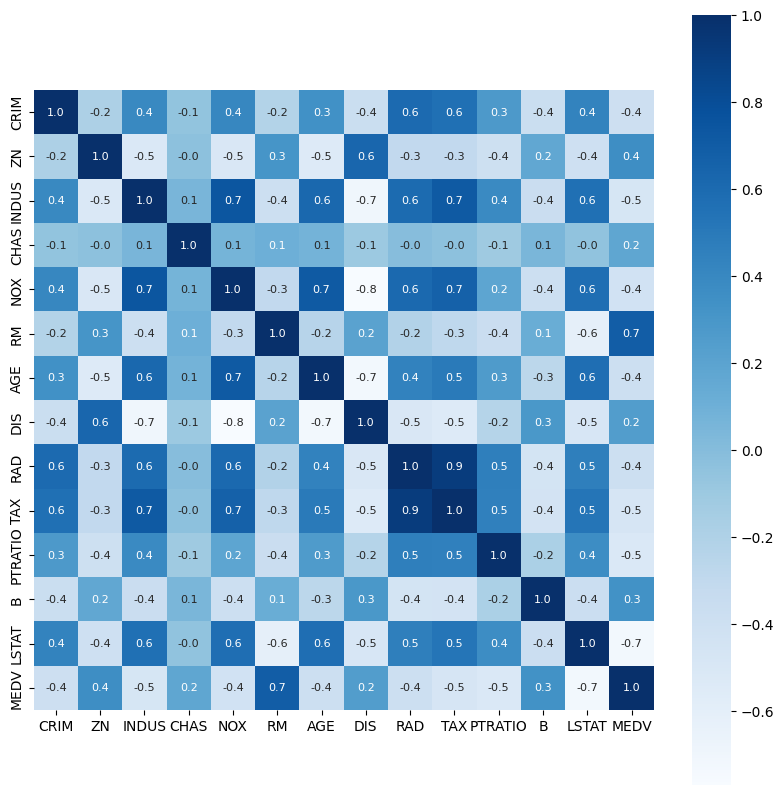

In [ ]:
# constructing the heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the Data and Target

In [ ]:
X = house_price_df.drop(['MEDV'], axis = 1)
Y = house_price_df['MEDV']

In [ ]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  76.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Splitting the data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

In [ ]:
# loading the model
model = XGBRegressor(
    n_estimators=80,     # Reduce the number of trees
    max_depth=3,         # Reduce tree depth further
    learning_rate=0.05,  # Slower learning rate
    reg_alpha=1.0,       # Increase L1 regularization
    reg_lambda=1.5,      # Increase L2 regularization
    subsample=0.8,       # Use only 80% of data per tree
    colsample_bytree=0.8 # Use only 80% of features per tree
)

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
# accurancy for training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[23.26038   22.21845   22.025229  35.393658  16.889135  13.799374
 21.112429  15.669979  12.954682  20.617601  15.754096   9.474835
 29.3478    43.50558   31.470612  19.899115  22.08377   21.090847
 31.494583  19.761324  27.041271   9.5214205 44.351162  21.071306
 19.881567  20.704721  21.467316  26.336956  21.659382  31.967802
 21.829866  10.047817  20.175856  18.578724  12.243097  16.151913
 14.973216  22.11305   17.854052  15.674988  23.69033   28.810652
 15.184178  17.70452   16.438375  15.471122  26.09939   18.204271
 46.76173   17.839184  20.907194  33.15546   17.439978  21.551907
 20.504286  21.157925  21.79123   34.947067  30.673544  31.971973
 21.3781    43.815277  15.916239   9.85147   22.889076  10.472773
 25.49401   17.849497  21.817303  46.41688   39.493042  34.58248
 23.320175  35.087242  24.314865  49.457478  14.244113  19.749464
 22.179867  23.438185  45.582294  23.806244  25.050808  20.004196
 44.791393  18.894762  31.332098  33.960747   9.3581295 20.540033
 18.390947 

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absoute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(score_1)
print(score_2)

0.9346300383417203
1.8013081253165064


Prediction on Test Data

In [ ]:
# accurancy for testing data
testing_data_prediction = model.predict(X_test)

In [ ]:
print(testing_data_prediction)

[20.575514 19.80323  34.793953 27.562626  9.836674 13.5495   27.201323
 25.86889  19.54173  19.823547 24.398033 24.134413 21.622658 20.792967
 23.97536  23.1004   19.15937  10.830842  9.583149 14.606257 22.98622
 20.177801 34.843494 17.733568 13.790646 19.66828  44.296528 31.62031
 33.603462 21.50319  17.412966 21.207117 29.39284  25.690918 11.307647
 17.057142 10.722286 19.967762 21.65828  21.606108 24.905325 15.415998
 31.714977  9.577891 21.247679 15.850531 36.89318  15.506318 31.362444
 12.000719 28.941153 29.586433  9.474835 34.645245 26.444525 19.818075
 20.304026 18.968412 16.980427 20.127176 18.655577 21.682314 18.577675
 28.209747 30.949337 24.339752 47.19194  28.283506 10.82378  23.376947
 15.424709  9.784764 20.954073 17.04189  26.24202  25.487186 20.917992
 21.676008 21.060125 23.594893 36.150005 18.275984 18.835804 28.215422
 36.584484 34.99405  17.988163 23.718744 29.066631 19.294462 21.836906
 20.505419 11.233385 41.277016 46.113102  9.926615 34.20621  35.212757
 19.1904

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean absoute error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print(score_1)
print(score_2)

0.904710276239278
2.1221040482614555


Visualizing the actual prices and predicted prices

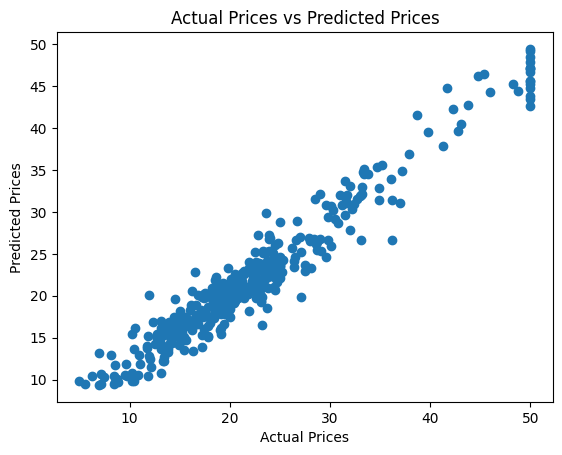

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()